### import das libs principais

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as snb

### Rodando a base

In [159]:
data_frame_heart = pd.read_csv('../base/heart.csv')

## Criando Pipeline

In [160]:

import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

def pipeline(modelo):
    # Variables define
    numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
    binary_features = ['Sex', 'ExerciseAngina']
    nominal_features = ['ChestPainType', 'RestingECG']
    ordinal_features = ['ST_Slope']

    # create the steps to be executed

    """This is done by creating a list of tuples, where each tuple contains a key and
    an instance to be executed."""

    numeric_transformer = Pipeline(steps=[('Encoder', RobustScaler())])
    binary_transformer = Pipeline(steps = [('Encoder', OrdinalEncoder())])
    nominal_transformer = Pipeline(steps = [('Encoder', OneHotEncoder(handle_unknown='ignore'))])
    ordinal_transformer = Pipeline(steps = [('Encoder', OrdinalEncoder(categories=[['Up', 'Flat', 'Down']]))])

    # Combining Everything

    preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_features),
                                                   ('bin', binary_transformer, binary_features),
                                                   ('nom', nominal_transformer, nominal_features),
                                                   ('ord', ordinal_transformer, ordinal_features)])

    return Pipeline(steps=[('preprocessor', preprocessor), ('DT', modelo)])

### Primeiros Dados

In [161]:
data_frame_heart.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Ultimos dados

In [162]:
data_frame_heart.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


### Informações Gerais

In [163]:
data_frame_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### Análise Descritiva

In [164]:
data_frame_heart.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


### Alguns gráficos

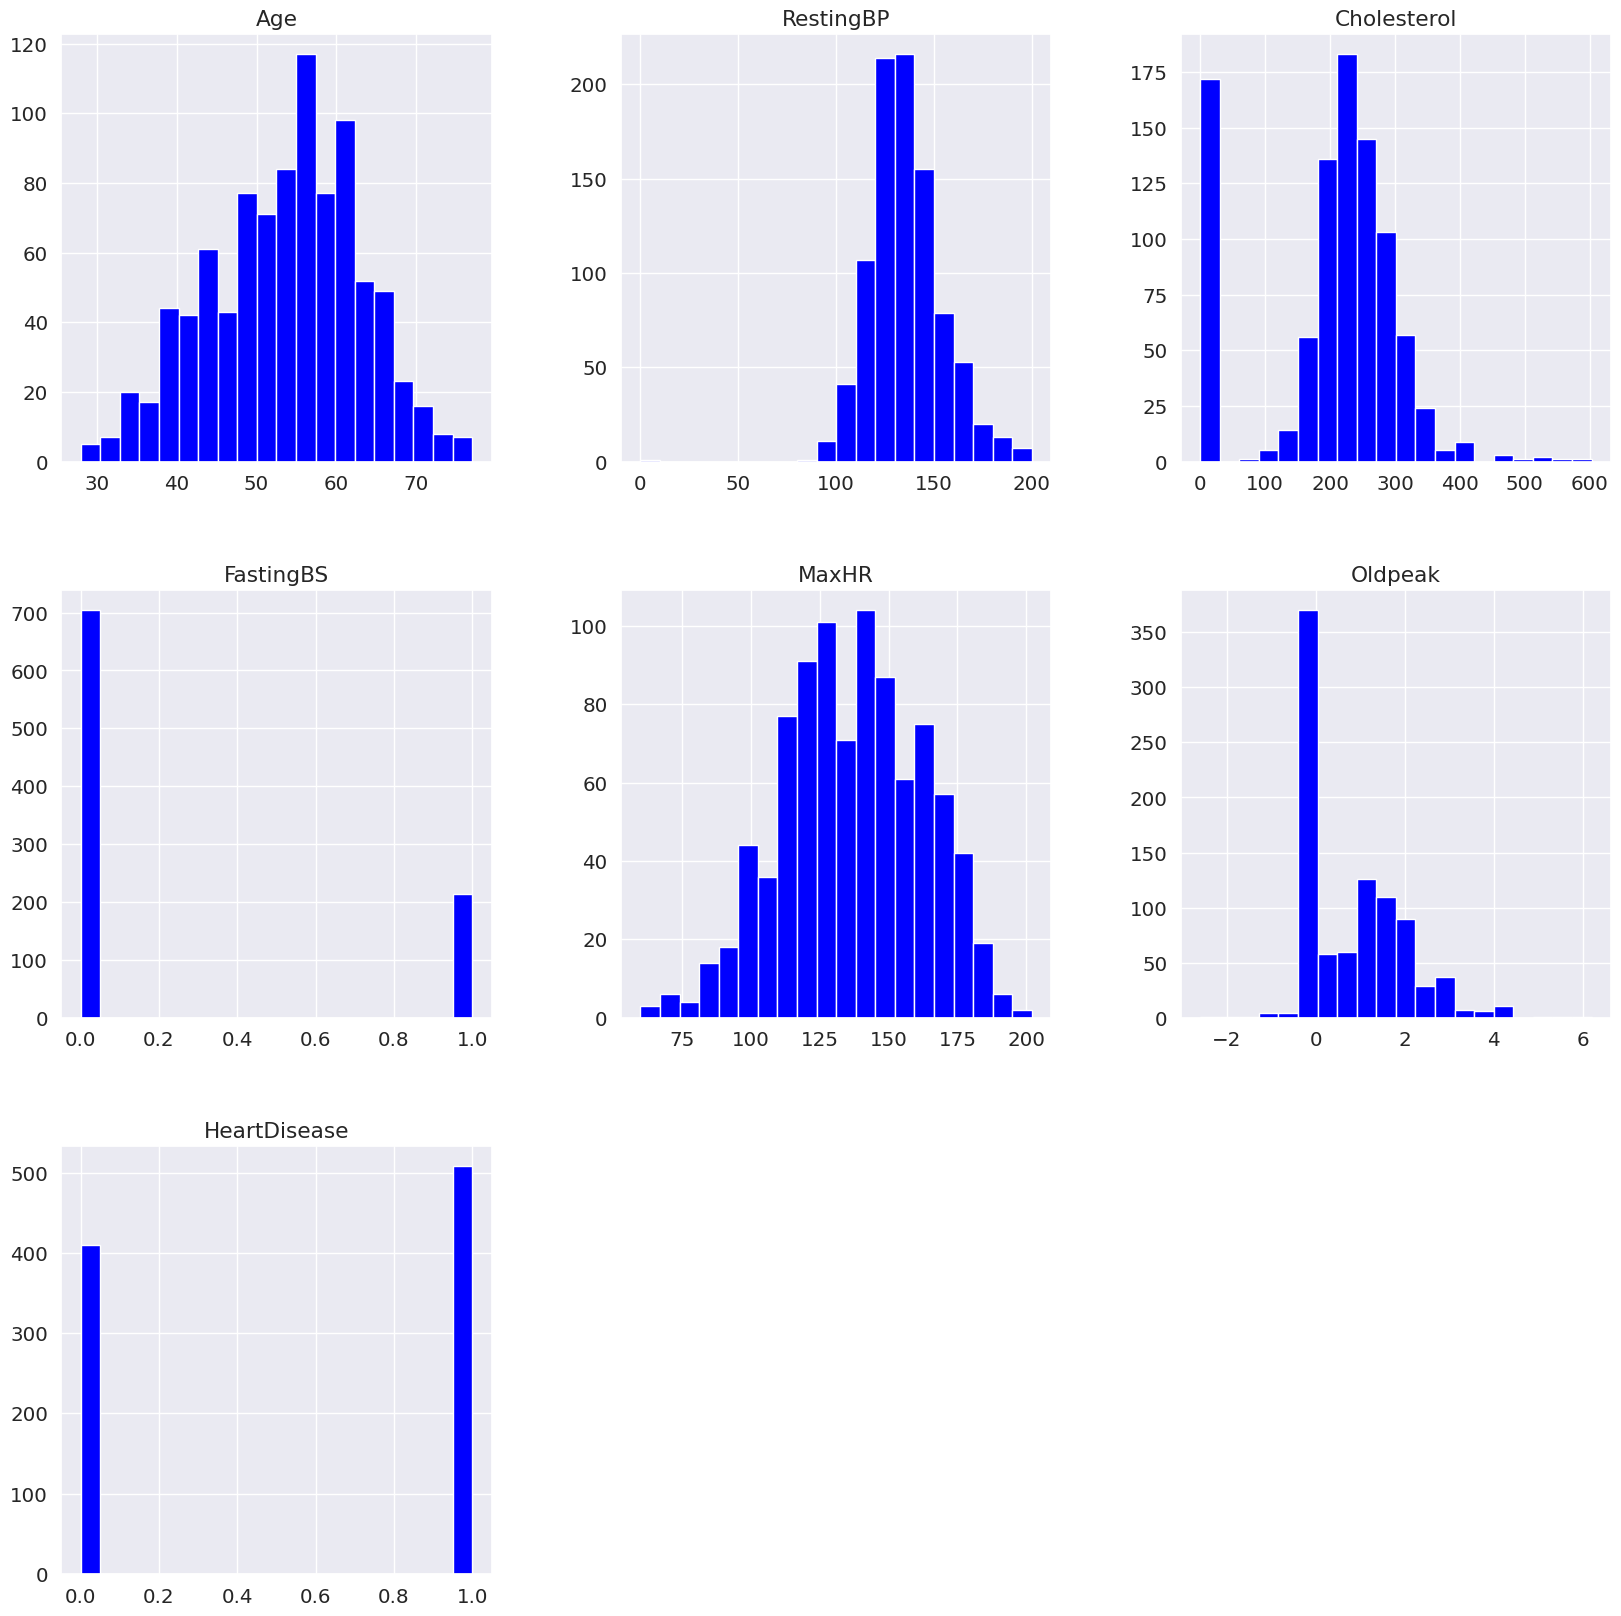

In [165]:
snb.set_theme(font_scale=1.3, rc={'figure.figsize': (20, 20)})
eixo = data_frame_heart.hist(bins=20, color='blue')

<Axes: xlabel='HeartDisease', ylabel='Age'>

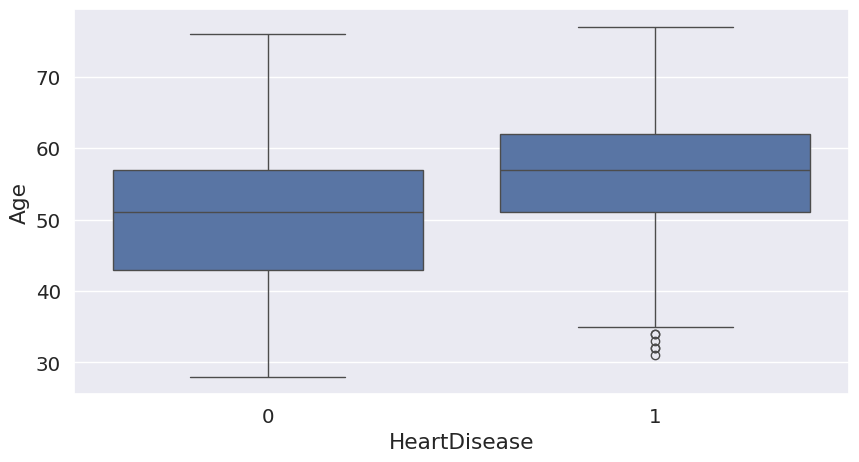

In [166]:
plt.figure(figsize=(10, 5))
snb.boxplot(data=data_frame_heart, x='HeartDisease', y='Age')

<Axes: xlabel='Oldpeak', ylabel='HeartDisease'>

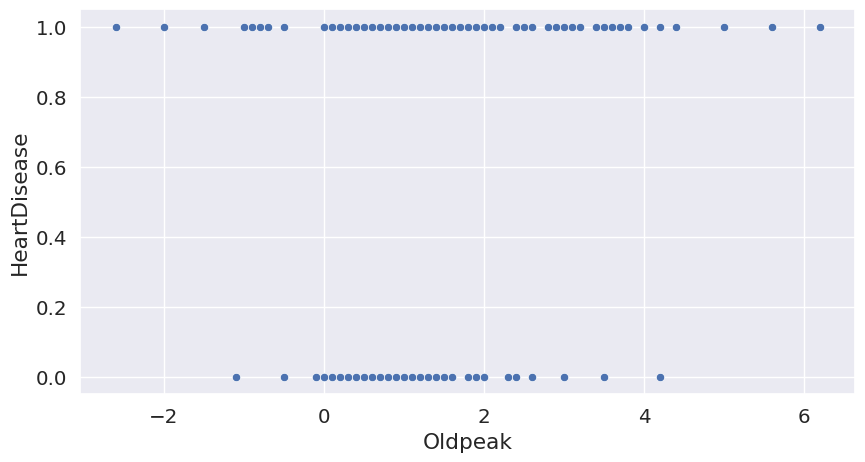

In [167]:
plt.figure(figsize=(10, 5))
snb.scatterplot(data=data_frame_heart, x='Oldpeak', y='HeartDisease')

### Aplicando modelo

In [168]:

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split as treinoteste

x_caracteristicas = data_frame_heart.iloc[:, :11]
y_previsor = data_frame_heart.iloc[:, 11]

* Gerando variáveis de treinamento

In [169]:
x_treino, x_teste, y_treino, y_teste = treinoteste(x_caracteristicas, y_previsor, test_size=0.6)

* Treinando modelo

In [170]:

from sklearn.model_selection import GridSearchCV


param_grid = {
    'DT__kernel': ['linear', 'rbf'],
    'DT__C': [0.1, 1, 10, 100],
    'DT__gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}



# GridSearch com validação cruzada
print("🔍 Buscando melhores hiperparâmetros...")
svm_model = GridSearchCV(
    pipeline(SVC()), 
    param_grid, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,  # Usar todos os cores disponíveis
    verbose=0
)

svm_model.fit(x_treino, y_treino)

🔍 Buscando melhores hiperparâmetros...


,estimator,"Pipeline(step...'DT', SVC())])"
,param_grid,"{'DT__C': [0.1, 1, ...], 'DT__gamma': ['scale', 'auto', ...], 'DT__kernel': ['linear', 'rbf']}"
,scoring,'accuracy'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('bin', ...), ...]"


* Realizamdo previsões

In [171]:
previssoes = svm_model.predict(x_teste)

In [172]:
previssoes

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,

### Avaliando modelo

* AUC ROC

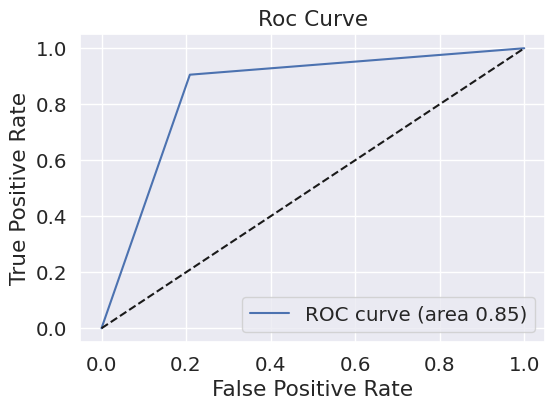

In [173]:
"""
False Positive Rate(fpr)
True Positive Rate (tpr)
"""

from sklearn.metrics import auc, roc_curve


fpr, tpr, thresholds = roc_curve(y_teste, previssoes)
roc_auc = auc(fpr, tpr)

#Graph
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'ROC curve (area {roc_auc:.2f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.title('Roc Curve')
plt.show()

* Precisão e Recall

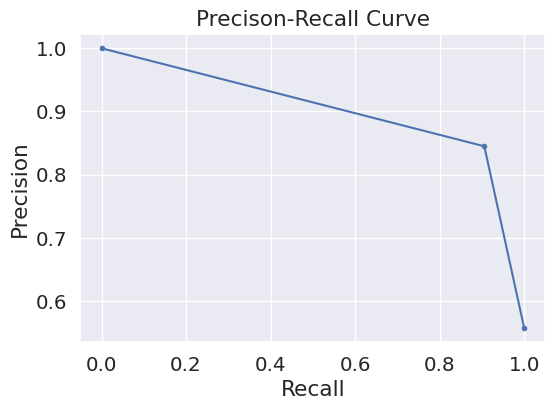

In [174]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_teste, previssoes)

# Graph
plt.figure(figsize=(6,4))
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precison-Recall Curve")
plt.show()

* Matriz de confusão

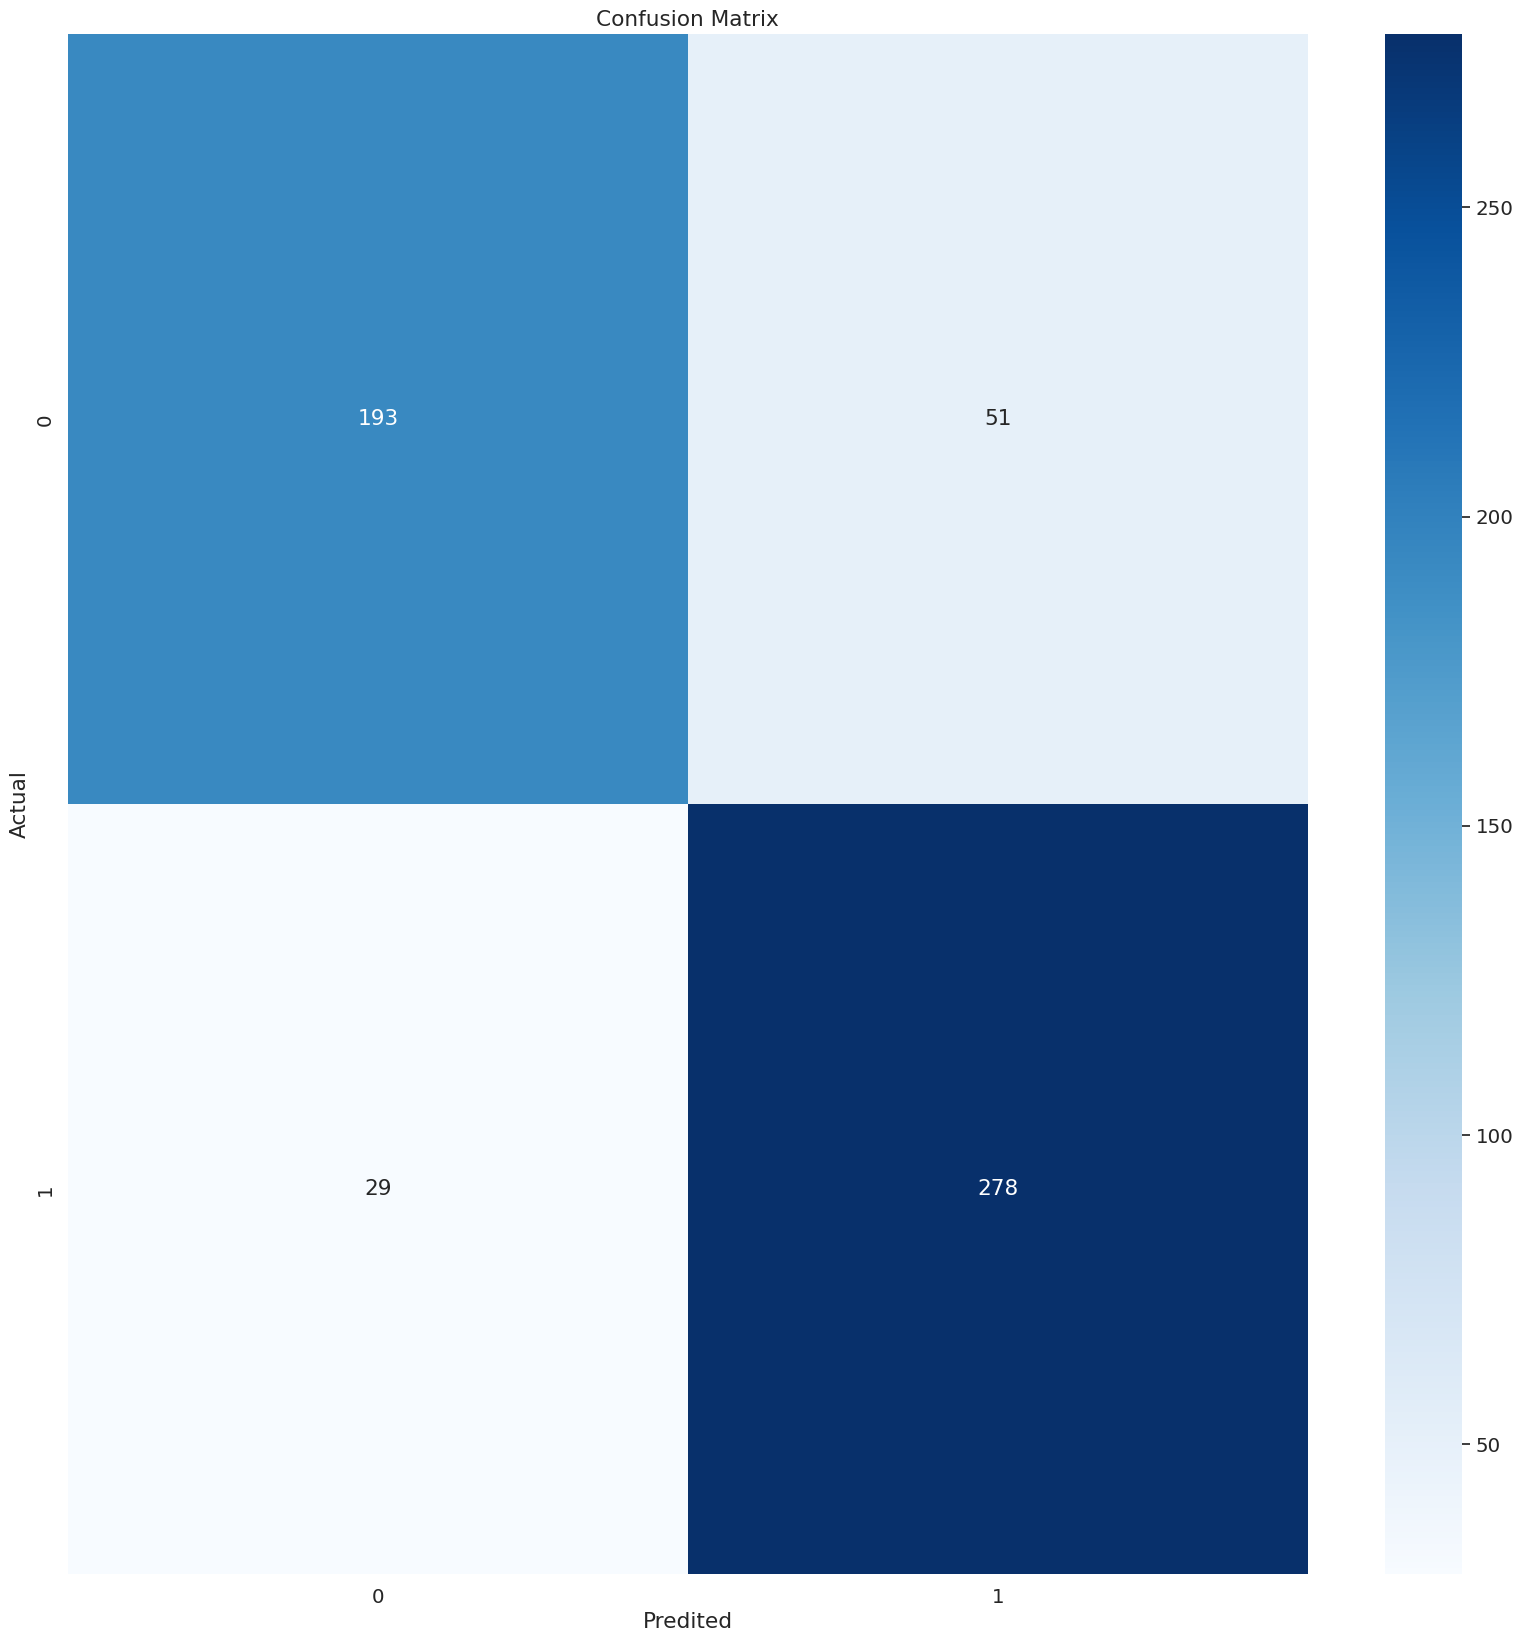

In [175]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_teste, previssoes)

# Graph

import seaborn as sns

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predited")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [176]:
from sklearn.metrics import classification_report

print(classification_report(y_teste, previssoes))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83       244
           1       0.84      0.91      0.87       307

    accuracy                           0.85       551
   macro avg       0.86      0.85      0.85       551
weighted avg       0.86      0.85      0.85       551



## Exibindo resultados graficamente

🔍 Buscando melhores hiperparâmetros...
✅ Melhores parâmetros: {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
✅ Melhor score: 0.815


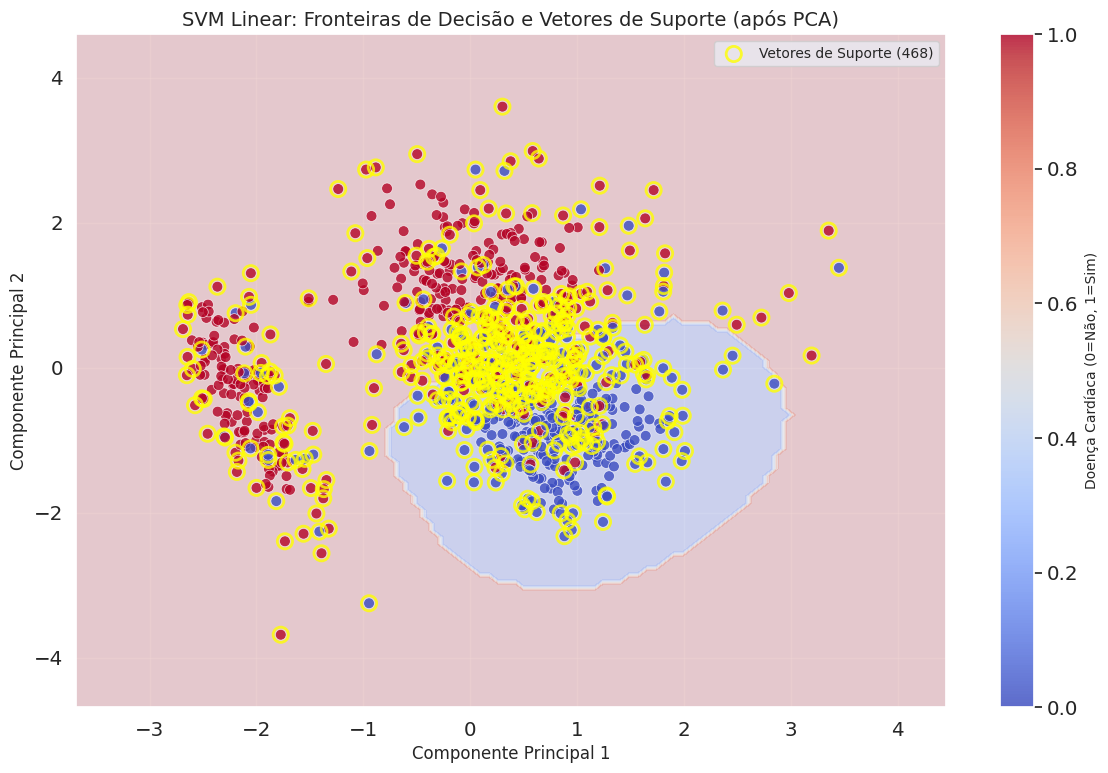

Número total de vetores de suporte: 468
Número total de amostras: 918
Porcentagem de vetores de suporte: 51.0%


In [177]:
# Plotando fronteiras de decisão com vetores de suporte destacados

from sklearn.decomposition import PCA


# 1. Pré-processa os dados originais
X_proc = svm_model.best_estimator_.named_steps['preprocessor'].transform(x_caracteristicas)

# 2. Reduz para 2D com PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_proc)

# 3. Treina um novo SVM só no espaço 2D para visualização

param_grid_graph = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1]
}



# GridSearch com validação cruzada
print("🔍 Buscando melhores hiperparâmetros...")
grid_search = GridSearchCV(
    SVC(random_state=42, kernel='linear'), 
    param_grid_graph, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1,  # Usar todos os cores disponíveis
    verbose=0
)

grid_search.fit(X_pca, y_previsor)

# Melhor modelo encontrado
best_svm = grid_search.best_estimator_
print(f"✅ Melhores parâmetros: {grid_search.best_params_}")
print(f"✅ Melhor score: {grid_search.best_score_:.3f}")


# 4. Cria o grid para plotar as fronteiras
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# 5. Faz a predição para cada ponto do grid
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = best_svm.predict(grid_points)
Z = Z.reshape(xx.shape)

# 6. Plota a fronteira e os pontos
plt.figure(figsize=(12,8))

# Plotar as regiões de decisão
plt.contourf(xx, yy, Z, alpha=0.2, cmap='coolwarm')

# Plotar todos os pontos de dados primeiro
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_previsor, cmap='coolwarm', 
                     edgecolors='white', alpha=0.8, s=60, linewidths=0.5)

# Destacar os vetores de suporte com círculos menores e mais transparentes
support_vectors = best_svm.support_vectors_
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], 
           s=120, facecolors='none', edgecolors='yellow', linewidths=2, alpha=0.8,
           label=f'Vetores de Suporte ({len(support_vectors)})')

# Adicionar a linha de separação (só funciona para kernel linear)
if best_svm.kernel == 'linear':
    w = best_svm.coef_[0]
    b = best_svm.intercept_[0]
    
    # Calcular a linha de decisão: w[0]*x + w[1]*y + b = 0 -> y = (-w[0]*x - b) / w[1]
    xx_line = np.linspace(x_min, x_max, 100)
    yy_line = -(w[0] * xx_line + b) / w[1]
    
    plt.plot(xx_line, yy_line, 'k-', linewidth=2, label='Fronteira de Decisão')
    
    # Margens (linhas paralelas)
    margin = 1 / np.sqrt(np.sum(w**2))
    yy_down = yy_line - np.sqrt(1 + (w[0]/w[1])**2) * margin
    yy_up = yy_line + np.sqrt(1 + (w[0]/w[1])**2) * margin
    
    plt.plot(xx_line, yy_up, 'k--', linewidth=1, alpha=0.7, label='Margens')
    plt.plot(xx_line, yy_down, 'k--', linewidth=1, alpha=0.7)

# Configurações do gráfico
plt.title('SVM Linear: Fronteiras de Decisão e Vetores de Suporte (após PCA)', fontsize=14)
plt.xlabel('Componente Principal 1', fontsize=12)
plt.ylabel('Componente Principal 2', fontsize=12)
plt.legend(fontsize=10)

# Adicionar barra de cores
cbar = plt.colorbar(scatter)
cbar.set_label('Doença Cardíaca (0=Não, 1=Sim)', fontsize=10)

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Número total de vetores de suporte: {len(support_vectors)}")
print(f"Número total de amostras: {len(X_pca)}")
print(f"Porcentagem de vetores de suporte: {len(support_vectors)/len(X_pca)*100:.1f}%")

### Rodando 30 vezes

In [178]:
from sklearn.model_selection import train_test_split


repetitions = 30

def run_n_times(n_repeticoes, scoring):
    medias = []
    for i in range(n_repeticoes):
        x_train, x_test, y_train, y_test = train_test_split(x_caracteristicas, y_previsor, test_size=0.2, random_state=i)
        
        # GridSearchCV with multiple metrics
        grid_search = GridSearchCV(
            svm_model.best_estimator_,
            param_grid,
            cv=5,
            scoring=scoring,
            n_jobs=-1
        )
        grid_search.fit(x_train, y_train)

        score = grid_search.cv_results_['mean_test_score'][grid_search.best_index_]
        
        print(
            f"Execution {i + 1}/{n_repeticoes} | Average F1-score: {score:.4f}" if scoring == 'f1' else 
            f"Execution {i + 1}/{n_repeticoes} | Average Balance Accuracy: {score:.4f}"
        )

        # Saves the average metrics of the best configuration
        medias.append(score)

    print(f"Final Average F1: {np.mean(medias):.4f}")
    return medias

* F1 Score

In [179]:
list_f1_medias = run_n_times(repetitions, 'f1')

Execution 1/30 | Average F1-score: 0.8891
Execution 2/30 | Average F1-score: 0.8755
Execution 3/30 | Average F1-score: 0.8896
Execution 4/30 | Average F1-score: 0.8756
Execution 5/30 | Average F1-score: 0.8793
Execution 6/30 | Average F1-score: 0.8700
Execution 7/30 | Average F1-score: 0.8842
Execution 8/30 | Average F1-score: 0.8820
Execution 9/30 | Average F1-score: 0.8876
Execution 10/30 | Average F1-score: 0.8757
Execution 11/30 | Average F1-score: 0.8869
Execution 12/30 | Average F1-score: 0.8916
Execution 13/30 | Average F1-score: 0.8811
Execution 14/30 | Average F1-score: 0.8735
Execution 15/30 | Average F1-score: 0.8957
Execution 16/30 | Average F1-score: 0.8889
Execution 17/30 | Average F1-score: 0.8703
Execution 18/30 | Average F1-score: 0.8889
Execution 19/30 | Average F1-score: 0.8929
Execution 20/30 | Average F1-score: 0.8907
Execution 21/30 | Average F1-score: 0.8849
Execution 22/30 | Average F1-score: 0.8795
Execution 23/30 | Average F1-score: 0.8763
Execution 24/30 | Av

* Balanced Accuracy

In [180]:
list_balacead_accuracy = run_n_times(repetitions, 'balanced_accuracy')

Execution 1/30 | Average Balance Accuracy: 0.8700
Execution 2/30 | Average Balance Accuracy: 0.8595
Execution 3/30 | Average Balance Accuracy: 0.8713
Execution 4/30 | Average Balance Accuracy: 0.8488
Execution 5/30 | Average Balance Accuracy: 0.8560
Execution 6/30 | Average Balance Accuracy: 0.8502
Execution 7/30 | Average Balance Accuracy: 0.8649
Execution 8/30 | Average Balance Accuracy: 0.8612
Execution 9/30 | Average Balance Accuracy: 0.8648
Execution 10/30 | Average Balance Accuracy: 0.8526
Execution 11/30 | Average Balance Accuracy: 0.8628
Execution 12/30 | Average Balance Accuracy: 0.8763
Execution 13/30 | Average Balance Accuracy: 0.8559
Execution 14/30 | Average Balance Accuracy: 0.8502
Execution 15/30 | Average Balance Accuracy: 0.8701
Execution 16/30 | Average Balance Accuracy: 0.8708
Execution 17/30 | Average Balance Accuracy: 0.8493
Execution 18/30 | Average Balance Accuracy: 0.8642
Execution 19/30 | Average Balance Accuracy: 0.8706
Execution 20/30 | Average Balance Accura